In [1]:
#load libraries-
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ggplot import *
from sklearn.metrics import r2_score
from scipy import stats

In [2]:
###set working directory###
os.chdir("D:\DATA SCIENCE STUDY METERIAL\Projects\Bike renting")
os.getcwd()

'D:\\DATA SCIENCE STUDY METERIAL\\Projects\\Bike renting'

In [3]:
### Load Bike renting Data CSV file ###
df= pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# 1.3 Expletory Data Analysis

## 1.3.1. Data Understanding

In [4]:
print(type(df))
print(df.shape)
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
(731, 16)
instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [5]:
print(df.columns)
print(df.shape)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')
(731, 16)


## 1.3.2. Data Pre Observation

In [6]:
#store categorical and continuous Variable column names
cat_var=["season","yr","mnth","holiday","weekday","workingday","weathersit"]
numeric_var=['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

In [7]:
#convert the data type of categorical variables to factor from integer
for i in cat_var:
    df.loc[:,i] = df.loc[:i].astype(object)
    
print(df.dtypes)

instant         int64
dteday         object
season         object
yr             object
mnth           object
holiday        object
weekday        object
workingday     object
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [8]:
for i in numeric_var:                                      
    print(df.loc[:,i].describe())                             #Checking Numerical variables summary
    
for i in cat_var:
    print(df.loc[:,i].describe())                             #Checking Categorical variable summary

count    731.000000
mean       0.495385
std        0.183051
min        0.059130
25%        0.337083
50%        0.498333
75%        0.655417
max        0.861667
Name: temp, dtype: float64
count    731.000000
mean       0.474354
std        0.162961
min        0.079070
25%        0.337842
50%        0.486733
75%        0.608602
max        0.840896
Name: atemp, dtype: float64
count    731.000000
mean       0.627894
std        0.142429
min        0.000000
25%        0.520000
50%        0.626667
75%        0.730209
max        0.972500
Name: hum, dtype: float64
count    731.000000
mean       0.190486
std        0.077498
min        0.022392
25%        0.134950
50%        0.180975
75%        0.233214
max        0.507463
Name: windspeed, dtype: float64
count     731.000000
mean      848.176471
std       686.622488
min         2.000000
25%       315.500000
50%       713.000000
75%      1096.000000
max      3410.000000
Name: casual, dtype: float64
count     731.000000
mean     3656.172367
std     

In [9]:
#Bar graph for Categorical variables
def plot_bar(x, y, method = 'sum'):
    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize= (12,4), squeeze=False)
    super_title = fig.suptitle("Bar Plot ",  fontsize='x-large')
    gp = df.groupby(by = x).sum()
    gp = gp.reset_index()
    sns.barplot(x= x, y = y, data = gp, ax=ax[0][0])
    fig.subplots_adjust(top = 0.90)
    plt.show()


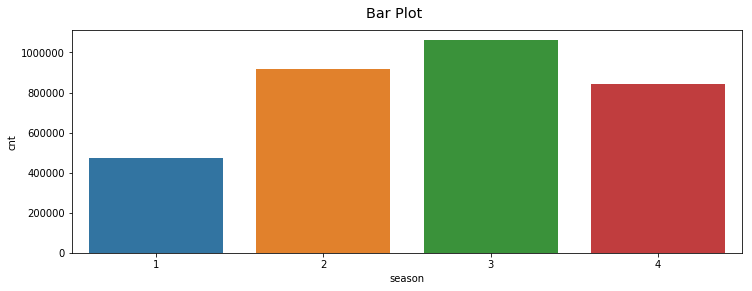

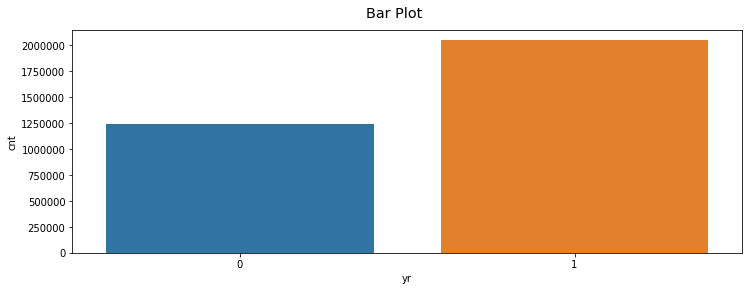

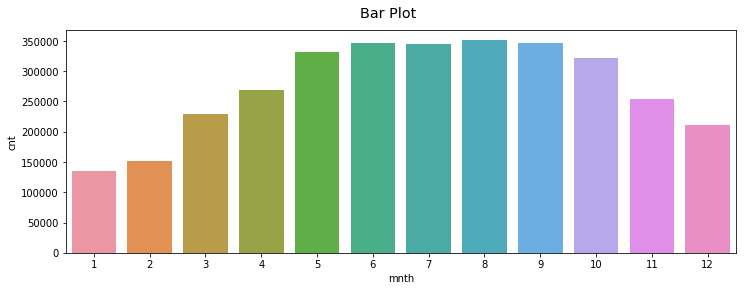

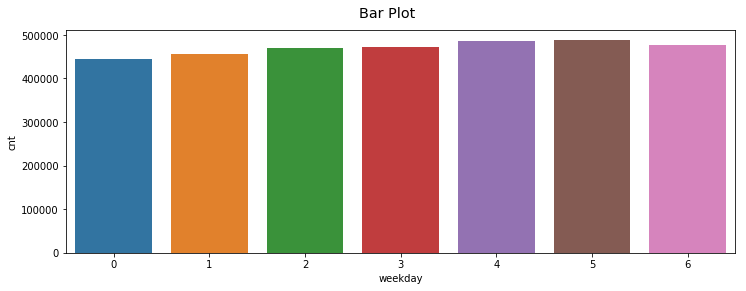

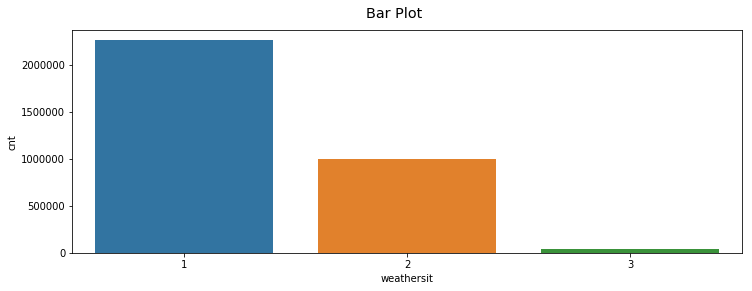

In [10]:
plot_bar('season','cnt')
plot_bar('yr','cnt')
plot_bar('mnth','cnt')
plot_bar('weekday','cnt')
plot_bar('weathersit','cnt')

temp


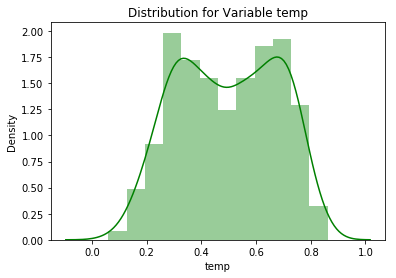

atemp


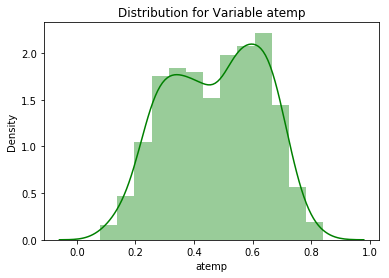

hum


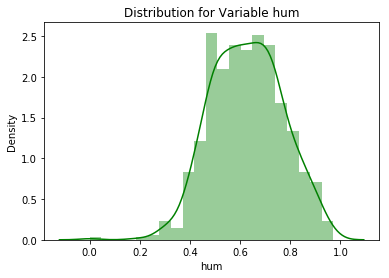

windspeed


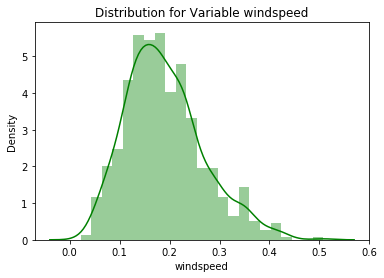

casual


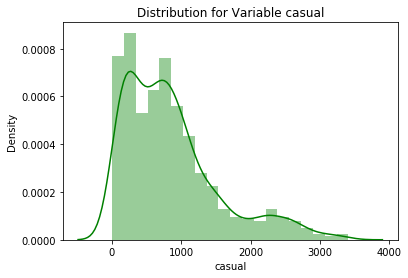

registered


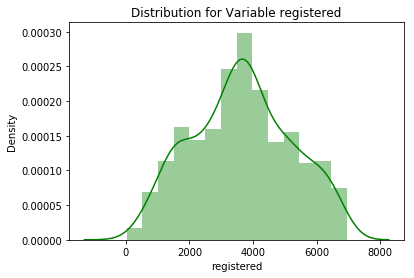

cnt


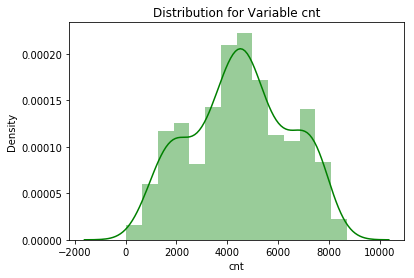

In [11]:
#distribution check and Histogram for continuous variables
for i in numeric_var:
    print(i)
    sns.distplot(df[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

#  2.1 Data Preprocessing

## 2.1.1. Missing Value Analysis

In [12]:
###################  2.1.1.	Missing Value Analysis  #######################
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## 2.1.2. Outlier Analysis

temp


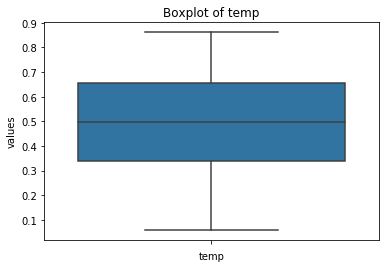

atemp


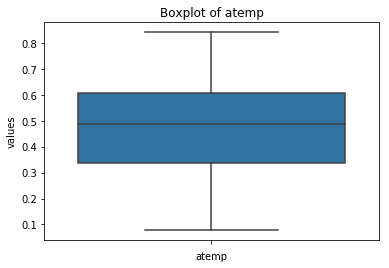

hum


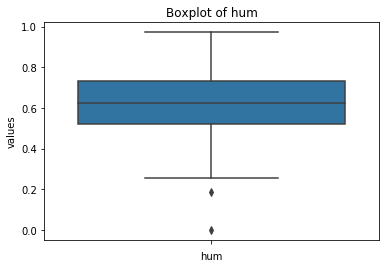

windspeed


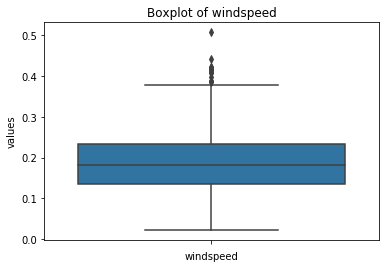

casual


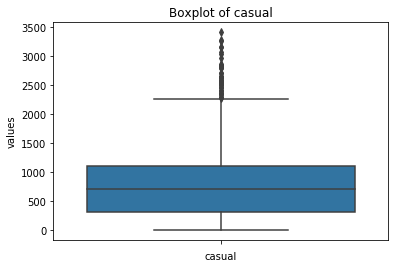

registered


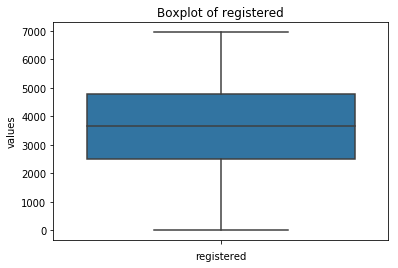

cnt


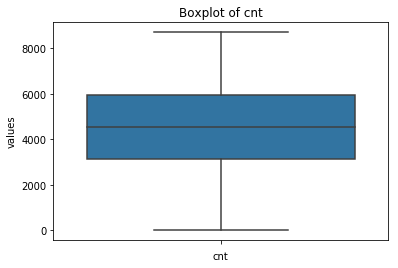

In [13]:
cnames=['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

#create Box plot for outlier analysis
for i in cnames:
    print(i)
    sns.boxplot(y=df[i])
    plt.xlabel(i)
    plt.ylabel("values")
    plt.title("Boxplot of "+i)
    plt.show()

In [14]:
#calculate iqr, lower fence and upper fence-
for i in cnames:
    print(i)
    q75,q25= np.percentile(df.loc[:,i],[75,25])
    iqr= q75-q25
    minimum= q25-(iqr*1.5)
    maximum= q75+(iqr*1.5)
    print("min= "+str(minimum))
    print("max= "+str(maximum))
    print("IQR= "+str(iqr))
    
#replace outliers with NA-
    df.loc[df[i]<minimum,i]=np.nan
    df.loc[df[i]>maximum,i]=np.nan   

temp
min= -0.14041600000000015
max= 1.1329160000000003
IQR= 0.3183330000000001
atemp
min= -0.06829675000000018
max= 1.0147412500000002
IQR= 0.2707595000000001
hum
min= 0.20468725
max= 1.0455212500000002
IQR= 0.21020850000000002
windspeed
min= -0.012446750000000034
max= 0.38061125
IQR= 0.0982645
casual
min= -855.25
max= 2266.75
IQR= 780.5
registered
min= -922.25
max= 8195.75
IQR= 2279.5
cnt
min= -1054.0
max= 10162.0
IQR= 2804.0


In [15]:
#impute NA with median-
df['hum']=df['hum'].fillna(df['hum'].median())
df['windspeed']=df['windspeed'].fillna(df['windspeed'].median())
df['casual']=df['casual'].fillna(df['casual'].median())

#check NA in data-
print(df.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


# 2.1.3. Feature selection

In [16]:
#correlation analysis for numeric variables-

#extract only numeric variables in dataframe for correlation-
df_corr= df.loc[:,numeric_var]

#generate correlation matrix-
corr_matrix= df_corr.corr()
(print(corr_matrix))

                temp     atemp       hum  windspeed    casual  registered  \
temp        1.000000  0.991702  0.123723  -0.138937  0.579585    0.540012   
atemp       0.991702  1.000000  0.137312  -0.164157  0.578667    0.544192   
hum         0.123723  0.137312  1.000000  -0.200237 -0.078884   -0.112172   
windspeed  -0.138937 -0.164157 -0.200237   1.000000 -0.178590   -0.203055   
casual      0.579585  0.578667 -0.078884  -0.178590  1.000000    0.421641   
registered  0.540012  0.544192 -0.112172  -0.203055  0.421641    1.000000   
cnt         0.627494  0.631066 -0.121454  -0.215203  0.593953    0.945517   

                 cnt  
temp        0.627494  
atemp       0.631066  
hum        -0.121454  
windspeed  -0.215203  
casual      0.593953  
registered  0.945517  
cnt         1.000000  


Text(0.5, 1.0, 'Correlation Plot')

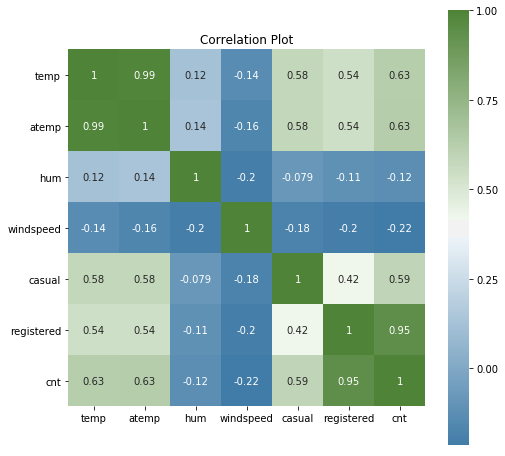

In [17]:
#correlation plot-
f,ax= plt.subplots(figsize=(8,8))

#plot-
sns.heatmap(corr_matrix,mask=np.zeros_like(corr_matrix,dtype=np.bool),cmap=sns.diverging_palette(240,120,as_cmap=True),
           square=True,ax=ax,annot=True)
plt.title("Correlation Plot")

In [18]:
#Anova analysis for categorical variable with target numeric variable

import statsmodels.api as sm
from statsmodels.formula.api import ols

label = 'cnt'
for  i in cat_var:
    frame = label + ' ~ ' + i
    model = ols(frame,data=df).fit()
    anova = sm.stats.anova_lm(model, typ=2)
    print(anova)  

                sum_sq     df           F        PR(>F)
season    9.505959e+08    3.0  128.769622  6.720391e-67
Residual  1.788940e+09  727.0         NaN           NaN
                sum_sq     df           F        PR(>F)
yr        8.798289e+08    1.0  344.890586  2.483540e-63
Residual  1.859706e+09  729.0         NaN           NaN
                sum_sq     df          F        PR(>F)
mnth      1.070192e+09   11.0  41.903703  4.251077e-70
Residual  1.669343e+09  719.0        NaN           NaN
                sum_sq     df         F    PR(>F)
holiday   1.279749e+07    1.0  3.421441  0.064759
Residual  2.726738e+09  729.0       NaN       NaN
                sum_sq     df         F    PR(>F)
weekday   1.765902e+07    6.0  0.782862  0.583494
Residual  2.721876e+09  724.0       NaN       NaN
                  sum_sq     df         F    PR(>F)
workingday  1.024604e+07    1.0  2.736742  0.098495
Residual    2.729289e+09  729.0       NaN       NaN
                  sum_sq     df          F 

## 2.1.5. Data after EDA and preprocessing

In [19]:
#Dimension Reduction-
df= df.drop(['instant','dteday','atemp','casual','registered','holiday','weekday','workingday'],axis=1)

print(df.shape)

(731, 8)


In [20]:
df.head()
df.to_csv("bike data for model development.csv", index = False)

In [21]:
#store categorical and continuous Variable column names
cat_var=["season","yr","mnth","weathersit"]
numeric_var=['temp', 'hum', 'windspeed', 'cnt']

In [24]:
data=df
df=data

In [25]:
# change categorical to numeric making bin for regression model
df= pd.get_dummies(df,columns=cat_var)

df.shape

(731, 25)

In [26]:
df.head()

,temp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,yr_0,yr_1,...,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_1,weathersit_2,weathersit_3
0,0.344167,0.805833,0.160446,985.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0.363478,0.696087,0.248539,801.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0.196364,0.437273,0.248309,1349.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0.200000,0.590435,0.160296,1562.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0.226957,0.436957,0.186900,1600.0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


# 2.2 Model Development

## 2.2.1 Model Building

In [63]:
#Import libraries-
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [64]:
#Function for Error metrics to calculate the performance of model
def MAPE(y_true,y_prediction):
    mape= np.mean(np.abs(y_true-y_prediction)/y_true)*100
    return mape

In [65]:
#split data for predictor and target seperatly-
X= df.drop(['cnt'],axis=1)
y= df['cnt']

In [66]:
#divide data into train and test part
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=.20,random_state=0)

## 2.2.1.desision tree for regression

In [67]:
from sklearn.tree import DecisionTreeRegressor                      #import libraries

DT_model= DecisionTreeRegressor(max_depth=2).fit(X_train,y_train)   #Decision tree for regression

DT_test= DT_model.predict(X_test)                                   #Model prediction on test data
DT_train= DT_model.predict(X_train)                                 #Model prediction on train data


MAPE_test= MAPE(y_test,DT_test)                                    #Model performance on test data
MAPE_train= MAPE(y_train,DT_train)                                 #Model performance on train data


r2_test=r2_score(y_test,DT_test)                                 #r2 value for test data
r2_train= r2_score(y_train,DT_train)                               #r2 value for train data


print("Mean Absolute Precentage Error for train data="+str(MAPE_train))
print("Mean Absolute Precentage Error for test data="+str(MAPE_test))
print("R^2_score for train data="+str(r2_train))
print("R^2_score for test data="+str(r2_test))

Mean Absolute Precentage Error for train data=62.26013293672567
Mean Absolute Precentage Error for test data=36.94809301452646
R^2_score for train data=0.6775629218593628
R^2_score for test data=0.6464697716428666


In [68]:
# result
df1= {'Model Name': ['Decision Tree'],'MAPE_Train':[MAPE_train],'MAPE_Test':[MAPE_test],'R-squared_Train':[r2_train],
      'R-squared_Test':[r2_test]}
result1= pd.DataFrame(df1)

## 2.2.2. Random forest for regression

In [69]:
from sklearn.ensemble import RandomForestRegressor                          #import libraris

RF_model= RandomForestRegressor(n_estimators=100).fit(X_train,y_train)      #Random Forest for regression


RF_test= RF_model.predict(X_test)                                           #model prediction on test data
RF_train= RF_model.predict(X_train)                                         #model prediction on train data


MAPE_test= MAPE(y_test,RF_test)                                             #Model performance on test data
MAPE_train= MAPE(y_train,RF_train)                                          #Model performance on train data


r2_test=r2_score(y_test,RF_test)                                            #r2 value for test data
r2_train= r2_score(y_train,RF_train)                                        #r2 value for train data

print("Mean Absolute Precentage Error for train data="+str(MAPE_train))
print("Mean Absolute Precentage Error for test data="+str(MAPE_test))
print("R^2_score for train data="+str(r2_train))
print("R^2_score for test data="+str(r2_test))

Mean Absolute Precentage Error for train data=18.251462766772878
Mean Absolute Precentage Error for test data=20.77264021718849
R^2_score for train data=0.9800991621204542
R^2_score for test data=0.8821339922166423


In [70]:
#result
df2= {'Model Name': ['Random Forest '],'MAPE_Train':[MAPE_train],'MAPE_Test':[MAPE_test],'R-squared_Train':[r2_train],
      'R-squared_Test':[r2_test]}
result2= pd.DataFrame(df2)

In [71]:
#appand the results
result= result1.append(result2)
result

,MAPE_Test,MAPE_Train,Model Name,R-squared_Test,R-squared_Train
0,36.948093,62.260133,Decision Tree,0.646470,0.677563
0,20.772640,18.251463,Random Forest,0.882134,0.980099


## 2.2.3. Linear Regression

In [72]:
import statsmodels.api as sm                                              #import libraries

LR_model= sm.OLS(y_train,X_train).fit()                                   #Linear Regression model for regression
LR_test= LR_model.predict(X_test)                                           #model prediction on test data
LR_train= LR_model.predict(X_train)                                         #model prediction on train data

MAPE_test= MAPE(y_test,LR_test)                                             #Model performance on test data
MAPE_train= MAPE(y_train,LR_train)                                          #Model performance on train data

r2_test=r2_score(y_test,LR_test)                                            #r2 value for test data
r2_train= r2_score(y_train,LR_train)                                        #r2 value for train data

print("Mean Absolute Precentage Error for train data="+str(MAPE_train))
print("Mean Absolute Precentage Error for test data="+str(MAPE_test))
print("R^2_score for train data="+str(r2_train))
print("R^2_score for test data="+str(r2_test))

Mean Absolute Precentage Error for train data=44.44451231255284
Mean Absolute Precentage Error for test data=18.800696038206958
R^2_score for train data=0.8327600660988469
R^2_score for test data=0.8411102698142884


In [73]:
df3= {'Model Name': ['Linear Regression '],'MAPE_Train':[MAPE_train],'MAPE_Test':[MAPE_test],'R-squared_Train':[r2_train],
      'R-squared_Test':[r2_test]}
result3= pd.DataFrame(df3)

In [74]:
result= result.append(result3)
result

,MAPE_Test,MAPE_Train,Model Name,R-squared_Test,R-squared_Train
0,36.948093,62.260133,Decision Tree,0.646470,0.677563
0,20.772640,18.251463,Random Forest,0.882134,0.980099
0,18.800696,44.444512,Linear Regression,0.841110,0.832760


## 2.2.4. Gradient Boosting

In [75]:
from sklearn.ensemble import GradientBoostingRegressor                      #import libraries

GB_model = GradientBoostingRegressor().fit(X_train, y_train)                #Gradient Boosting for regression

GB_test= GB_model.predict(X_test)                                           #model prediction on test data
GB_train= GB_model.predict(X_train)                                         #model prediction on train data

MAPE_test= MAPE(y_test,GB_test)                                             #Model performance on test data
MAPE_test= MAPE(y_train,GB_train)                                           #Model performance on train data

r2_test=r2_score(y_test,GB_test)                                            #r2 value for test data
r2_train= r2_score(y_train,GB_train)                                        #r2 value for train data

print("Mean Absolute Precentage Error for train data="+str(MAPE_train))
print("Mean Absolute Precentage Error for test data="+str(MAPE_test))
print("R^2_score for train data="+str(r2_train))
print("R^2_score for test data="+str(r2_test))

Mean Absolute Precentage Error for train data=44.44451231255284
Mean Absolute Precentage Error for test data=11.744814513512651
R^2_score for train data=0.9453851786306906
R^2_score for test data=0.8650758684985291


In [76]:
df4= {'Model Name': ['Gradient Boosting '],'MAPE_Train':[MAPE_train],'MAPE_Test':[MAPE_test],'R-squared_Train':[r2_train],
      'R-squared_Test':[r2_test]}
result4= pd.DataFrame(df4)

In [77]:
result= result.append(result4)
result

,MAPE_Test,MAPE_Train,Model Name,R-squared_Test,R-squared_Train
0,36.948093,62.260133,Decision Tree,0.646470,0.677563
0,20.772640,18.251463,Random Forest,0.882134,0.980099
0,18.800696,44.444512,Linear Regression,0.841110,0.832760
0,11.744815,44.444512,Gradient Boosting,0.865076,0.945385


## 2.2.2. Hyperparameter Tuning

### Random Search CV in Random Forest

In [78]:
from sklearn.model_selection import RandomizedSearchCV                                  #import libraries

RandomRandomForest = RandomForestRegressor(random_state = 0)
n_estimator = list(range(1,100,2))
depth = list(range(1,20,2))
random_search = {'n_estimators':n_estimator, 'max_depth': depth}

#Random Grid Random Forest model-
RRF_model= RandomizedSearchCV(RandomRandomForest,param_distributions= random_search,n_iter=3,cv=10)
RRF_model= RRF_model.fit(X_train,y_train)

best_parameters = RRF_model.best_params_                                            #Best parameters for model

best_model = RRF_model.best_estimator_                                              #Best model

RRF_test = best_model.predict(X_test)                                               #Model prediction on test data
RRF_train = best_model.predict(X_train)                                             #Model prediction on train data

MAPE_test= MAPE(y_test,RRF_test)                                                    #Model performance on test data
MAPE_train= MAPE(y_train,RRF_train)                                                 #Model performance on train data

r2_test=r2_score(y_test,RRF_test)                                                   #r2 value for test data
r2_train= r2_score(y_train,RRF_train)                                               #r2 value for train data

print("Best Parameter="+str(best_parameters))
print("Best Model="+str(best_model))
print("Mean Absolute Precentage Error for train data="+str(MAPE_train))
print("Mean Absolute Precentage Error for test data="+str(MAPE_test))
print("R^2_score for train data="+str(r2_train))
print("R^2_score for test data="+str(r2_test))

Best Parameter={'n_estimators': 7, 'max_depth': 5}
Best Model=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=7, n_jobs=None,
                      oob_score=False, random_state=0, verbose=0,
                      warm_start=False)
Mean Absolute Precentage Error for train data=31.455186174856415
Mean Absolute Precentage Error for test data=23.428615645676306
R^2_score for train data=0.8995418019916338
R^2_score for test data=0.8349591159418573


In [79]:
df5= {'Model Name': ['Random Search CV in Random Forest '],'MAPE_Train':[MAPE_train],
      'MAPE_Test':[MAPE_test],'R-squared_Train':[r2_train],'R-squared_Test':[r2_test]}
result5= pd.DataFrame(df5)

In [80]:
result= result.append(result5)
result

,MAPE_Test,MAPE_Train,Model Name,R-squared_Test,R-squared_Train
0,36.948093,62.260133,Decision Tree,0.646470,0.677563
0,20.772640,18.251463,Random Forest,0.882134,0.980099
0,18.800696,44.444512,Linear Regression,0.841110,0.832760
0,11.744815,44.444512,Gradient Boosting,0.865076,0.945385
0,23.428616,31.455186,Random Search CV in Random Forest,0.834959,0.899542


### Grid Search CV in Random Forest

In [81]:
from sklearn.model_selection import GridSearchCV                                  #import libraries

GridRandomForest= RandomForestRegressor(random_state=0)
n_estimator = list(range(1,20,2))
depth= list(range(1,20,2))
grid_search= {'n_estimators':n_estimator, 'max_depth': depth}

#Grid Search CV Random Forest model-
GRF_model= GridSearchCV(GridRandomForest,param_grid=grid_search,cv=10)
GRF_model= GRF_model.fit(X_train,y_train)

best_parameters = GRF_model.best_params_                                        #Best parameters for model

best_model = GRF_model.best_estimator_                                          #Best model

GRF_test = best_model.predict(X_test)                                           #Model prediction on test data
GRF_train = best_model.predict(X_train)                                         #Model prediction on train data

MAPE_test= MAPE(y_test,GRF_test)                                                #Model performance on test data
MAPE_train= MAPE(y_train,GRF_train)                                             #Model performance on train data

r2_test=r2_score(y_test,GRF_test)                                               #r2 value for test data
r2_train= r2_score(y_train,GRF_train)                                           #r2 value for train data

print("Best Parameter="+str(best_parameters))
print("Best Model="+str(best_model))
print("Mean Absolute Precentage Error for train data="+str(MAPE_train))
print("Mean Absolute Precentage Error for test data="+str(MAPE_test))
print("R^2_score for train data="+str(r2_train))
print("R^2_score for test data="+str(r2_test))

Best Parameter={'max_depth': 9, 'n_estimators': 17}
Best Model=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=17,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)
Mean Absolute Precentage Error for train data=21.314451754065416
Mean Absolute Precentage Error for test data=20.556714601464996
R^2_score for train data=0.9648364550539172
R^2_score for test data=0.8755788959468711


C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [82]:
df6= {'Model Name': ['Grid Search CV in Random Forest '],'MAPE_Train':[MAPE_train],'MAPE_Test':[MAPE_test],
      'R-squared_Train':[r2_train],'R-squared_Test':[r2_test]}
result6= pd.DataFrame(df6)

In [83]:
result= result.append(result6)
result

,MAPE_Test,MAPE_Train,Model Name,R-squared_Test,R-squared_Train
0,36.948093,62.260133,Decision Tree,0.646470,0.677563
0,20.772640,18.251463,Random Forest,0.882134,0.980099
0,18.800696,44.444512,Linear Regression,0.841110,0.832760
0,11.744815,44.444512,Gradient Boosting,0.865076,0.945385
0,23.428616,31.455186,Random Search CV in Random Forest,0.834959,0.899542
0,20.556715,21.314452,Grid Search CV in Random Forest,0.875579,0.964836


### Random Search CV in Gradient Boosting

In [84]:
from sklearn.model_selection import RandomizedSearchCV                             #import libraries

RandomGradientBoosting = GradientBoostingRegressor(random_state = 0)
n_estimator = list(range(1,100,2))
depth = list(range(1,20,2))
random_search = {'n_estimators':n_estimator, 'max_depth': depth}

#Random Gradient Boosting model-
RGB_model= RandomizedSearchCV(RandomGradientBoosting,param_distributions= random_search,n_iter=3,cv=10)
RGB_model= RGB_model.fit(X_train,y_train)

best_parameters = RGB_model.best_params_                                          #Best parameters for model
best_model = RGB_model.best_estimator_                                            #Best model

RGB_test = best_model.predict(X_test)                                             #Model prediction on test data
RGB_train = best_model.predict(X_train)                                           #Model prediction on train data

MAPE_test= MAPE(y_test,RGB_test)                                                  #Model performance on test data
MAPE_train= MAPE(y_train,RGB_train)                                               #Model performance on train data

r2_test=r2_score(y_test,RGB_test)                                                 #r2 value for test data
r2_train= r2_score(y_train,RGB_train)                                             #r2 value for train data

print("Best Parameter="+str(best_parameters))
print("Best Model="+str(best_model))
print("Mean Absolute Precentage Error for train data="+str(MAPE_train))
print("Mean Absolute Precentage Error for test data="+str(MAPE_test))
print("R^2_score for train data="+str(r2_train))
print("R^2_score for test data="+str(r2_test))

Best Parameter={'n_estimators': 91, 'max_depth': 5}
Best Model=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=91,
                          n_iter_no_change=None, presort='auto', random_state=0,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)
Mean Absolute Precentage Error for train data=4.850953429555899
Mean Absolute Precentage Error for test data=20.550809387654315
R^2_score for train data=0.9865340617434155
R^2_score for test data=0.8718793668366579


In [85]:
df7= {'Model Name': ['Random Search CV in Gradient Boosting '],'MAPE_Train':[MAPE_train],'MAPE_Test':[MAPE_test],
      'R-squared_Train':[r2_train],'R-squared_Test':[r2_test]}
result7= pd.DataFrame(df7)

In [86]:
result= result.append(result7)
result

,MAPE_Test,MAPE_Train,Model Name,R-squared_Test,R-squared_Train
0,36.948093,62.260133,Decision Tree,0.646470,0.677563
0,20.772640,18.251463,Random Forest,0.882134,0.980099
0,18.800696,44.444512,Linear Regression,0.841110,0.832760
0,11.744815,44.444512,Gradient Boosting,0.865076,0.945385
0,23.428616,31.455186,Random Search CV in Random Forest,0.834959,0.899542
0,20.556715,21.314452,Grid Search CV in Random Forest,0.875579,0.964836
0,20.550809,4.850953,Random Search CV in Gradient Boosting,0.871879,0.986534


### Grid Search CV in Gradient Boosting

In [87]:
from sklearn.model_selection import GridSearchCV                                        #import libraries

GridGradientBoosting= GradientBoostingRegressor(random_state=0)
n_estimator = list(range(1,20,2))
depth= list(range(1,20,2))
grid_search= {'n_estimators':n_estimator, 'max_depth': depth}

GGB_model= GridSearchCV(GridGradientBoosting,param_grid=grid_search,cv=5)               #Grid Random Forest model
GGB_model= GGB_model.fit(X_train,y_train)

best_parameters = GGB_model.best_params_                                                #Best parameters for model
best_model = GGB_model.best_estimator_                                                  #Best model

GGB_test = best_model.predict(X_test)                                                   #Model prediction on test data
GGB_train = best_model.predict(X_train)                                                 #Model prediction on train data

MAPE_test= MAPE(y_test,GGB_test)                                                        #Model performance on test data
MAPE_train= MAPE(y_train,GGB_train)                                                     #Model performance on train data

r2_test=r2_score(y_test,GGB_test)                                                       #r2 value for test data
r2_train= r2_score(y_train,GGB_train)                                                   #r2 value for train data

print("Best Parameter="+str(best_parameters))
print("Best Model="+str(best_model))
print("Mean Absolute Precentage Error for train data="+str(MAPE_train))
print("Mean Absolute Precentage Error for test data="+str(MAPE_test))
print("R^2_score for train data="+str(r2_train))
print("R^2_score for test data="+str(r2_test))

Best Parameter={'max_depth': 5, 'n_estimators': 19}
Best Model=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=19,
                          n_iter_no_change=None, presort='auto', random_state=0,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)
Mean Absolute Precentage Error for train data=18.833447720956062
Mean Absolute Precentage Error for test data=25.485646188467083
R^2_score for train data=0.9221138936676011
R^2_score for test data=0.8337462222690681


In [88]:
df8= {'Model Name': ['Grid Search CV in Gradient Booster '],'MAPE_Train':[MAPE_train],'MAPE_Test':[MAPE_test],
      'R-squared_Train':[r2_train],'R-squared_Test':[r2_test]}
result8= pd.DataFrame(df8)

In [89]:
result= result.append(result8)
result

,MAPE_Test,MAPE_Train,Model Name,R-squared_Test,R-squared_Train
0,36.948093,62.260133,Decision Tree,0.646470,0.677563
0,20.772640,18.251463,Random Forest,0.882134,0.980099
0,18.800696,44.444512,Linear Regression,0.841110,0.832760
0,11.744815,44.444512,Gradient Boosting,0.865076,0.945385
0,23.428616,31.455186,Random Search CV in Random Forest,0.834959,0.899542
0,20.556715,21.314452,Grid Search CV in Random Forest,0.875579,0.964836
0,20.550809,4.850953,Random Search CV in Gradient Boosting,0.871879,0.986534
0,25.485646,18.833448,Grid Search CV in Gradient Booster,0.833746,0.922114
